In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## Step 1 - Get Unit Weight

shapes: (20, 1)


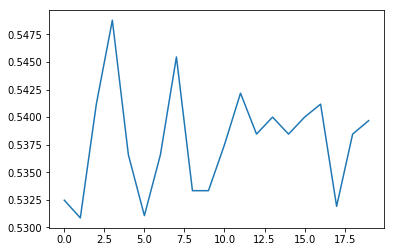

In [3]:
weights = np.array([[41, 43, 46, 45, 44, 47, 44, 30, 32, 32,
                     43, 45, 35, 27, 21, 27, 46, 25, 35, 34,
                    ]]
                  ).transpose()
numbers = np.array([[77, 81, 85, 82, 82, 88.5, 82, 55, 60, 60, 
                     80, 83, 65, 50, 39, 50, 85, 47, 65, 63,
                    ]]
                  ).transpose()
print("shapes:", weights.shape)

fish_weights = weights/numbers
plt.plot(fish_weights)

(array([4., 2., 0., 3., 4., 4., 1., 0., 1., 1.]),
 array([0.5308642 , 0.53265583, 0.53444746, 0.53623908, 0.53803071,
        0.53982234, 0.54161397, 0.5434056 , 0.54519723, 0.54698886,
        0.54878049]),
 <a list of 10 Patch objects>)

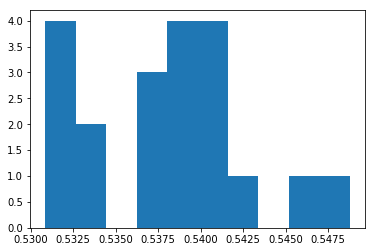

In [4]:
plt.hist(fish_weights, 10)

In [5]:
mu = fish_weights.mean()
std = fish_weights.std()

print("mean:", mu)
print("std:", std)
print("min/max:", fish_weights.min(), fish_weights.max())

mean: 0.5378740636259465
std: 0.004662838260396349
min/max: 0.5308641975308642 0.5487804878048781


In [6]:
expected_weight = 30/55  # according to the nutrition guide
confidence_interval = stats.norm.interval(0.50, loc=expected_weight,
                                          scale=0.03)  # just some guesses

print("expected weight:", expected_weight)
print("50% interval:", confidence_interval)

n_needed = (2*1.96*0.03)**2 / 0.01**2  # 95% confidence on .03 std, < -.01 error
print("sample size needed:", n_needed)  # don't have time pho dis

expected weight: 0.5454545454545454
50% interval: (0.5252198529486629, 0.5656892379604279)
sample size needed: 138.2976


## Step 2 - Get Density

In [7]:
WEIGHT = mu
#WEIGHT = expected_weight
volumes = np.array([
    [10.4 * 6.1 * 3],
    [13 * 8.5 * 5], # [13 * 8.5 * 5.3],
    [16 * 9 * 5]
]).transpose()
weights = np.array([
    [44, 46, 46, 45, 44, 47, 46],
    [144, 141, 145, 146, 144, 140, 143],
    [179, 179, 179, 178, 178, 178, 178]
]).transpose()
cnumbers = weights / WEIGHT

d = cnumbers / volumes
container_means = d.mean(axis=0)
print(d)
print("container means:", container_means)

[[0.42982101 0.48456228 0.46221063]
 [0.44935833 0.47446724 0.46221063]
 [0.44935833 0.4879273  0.46221063]
 [0.43958967 0.49129231 0.45962845]
 [0.42982101 0.48456228 0.45962845]
 [0.45912699 0.47110222 0.45962845]
 [0.44935833 0.48119727 0.45962845]]
container means: [0.44377624 0.4821587  0.4607351 ]


In [8]:
print("mean:", d.mean())
print("std:", d.std())
print("min/max:", d.min(), d.max())

interval = stats.norm.interval(0.5, loc=d.mean(), scale=d.std())
print("interval:", interval)

mean: 0.462223347183501
std: 0.01723460541842234
min/max: 0.42982101403693374 0.49129231456850464
interval: (0.45059878248010127, 0.47384791188690073)


## Step 3 - Estimate

In [15]:
tank_volume = 21.5 * 22 * 19.3

#tank_interval = np.array(
#    stats.norm.interval(.80, loc=tank_volume, scale=200))
tank_interval = np.array(
    stats.norm.interval(.05, loc=tank_volume, scale=200))

pce = container_means * tank_volume
print("per-container estimates:", pce)
print("overall estimate:", pce.mean())

gint = interval * tank_interval
print("guess interval:", gint);


gint = (4100, 4330)
step = (gint[1] - gint[0]) / 7
guesses = range(int(gint[0]), int(gint[1])+1, int(step))
print("GUESSES:", [i for i in guesses])

per-container estimates: [4051.18893345 4401.57855743 4206.00465143]
overall estimate: 4219.5907141034595
guess interval: [4107.82010582 4331.65289798]
GUESSES: [4100, 4132, 4164, 4196, 4228, 4260, 4292, 4324]


## Step 4 - Pick Up the TV

... or not.